In [7]:
import pandas as pd
import os
from glob import glob

# Caminho da pasta contendo os arquivos CSV
data_path = "data/"
all_files = glob(os.path.join(data_path, "datatran*.csv"))

# Lista para armazenar todos os DataFrames
df_list = []

for file in all_files:
    # Detectar o encoding automaticamente
    try:
        # Tentar ler o CSV com diferentes delimitadores
        df = pd.read_csv(file, sep=';', encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file, sep=';', encoding='ISO-8859-1')
    
    # Adicionar a coluna 'ano' se estiver ausente, derivando da coluna 'data_inversa'
    if 'ano' not in df.columns:
        df['ano'] = pd.to_datetime(df['data_inversa'], errors='coerce').dt.year
    
    # Padronizar o nome das colunas para evitar problemas
    df.columns = df.columns.str.lower().str.strip()
    
    # Adicionar o DataFrame à lista
    df_list.append(df)

# Concatenar todos os DataFrames
df = pd.concat(df_list, ignore_index=True)

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/2852467902.py:18: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';', encoding='ISO-8859-1')
/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/2852467902.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ano'] = pd.to_datetime(df['data_inversa'], errors='coerce').dt.year
/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/2852467902.py:18: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';', encoding='ISO-8859-1')
/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/2852467902.py:18: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memo

# 1. Análise de Distribuição de Acidentes por Ano

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/3421279976.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_year.index, y=accidents_by_year.values, palette='viridis')


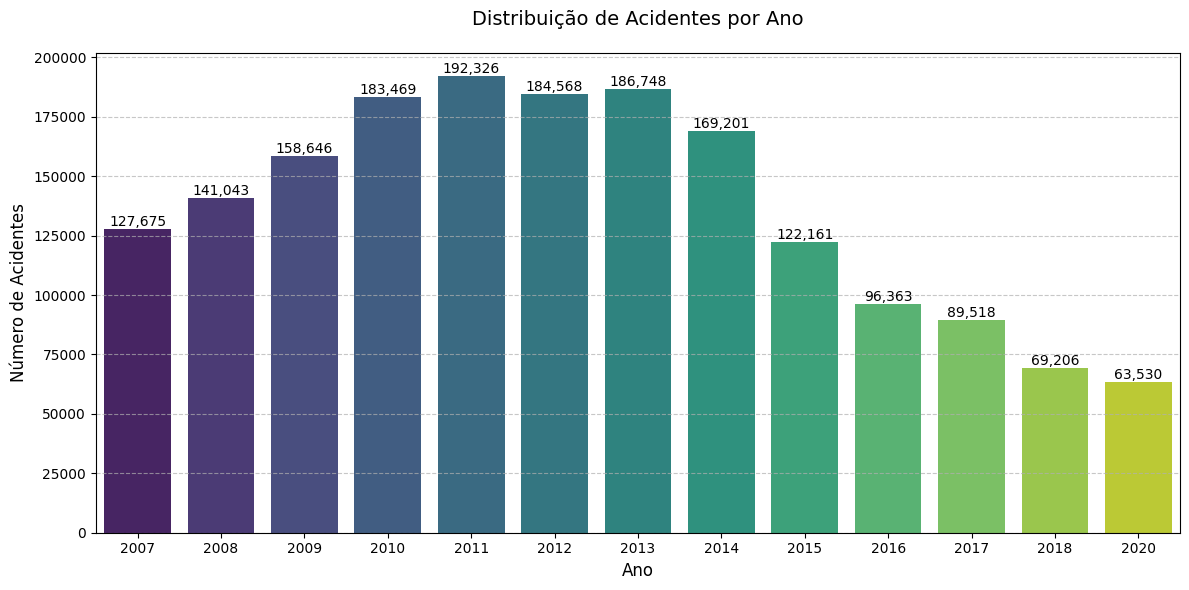

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
accidents_by_year = df['ano'].value_counts().sort_index()

sns.barplot(x=accidents_by_year.index, y=accidents_by_year.values, palette='viridis')
plt.title("Distribuição de Acidentes por Ano", pad=20, fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Adicionar valores nas barras
for i, v in enumerate(accidents_by_year.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2.	Acidentes por estado (UF):


/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/743287773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


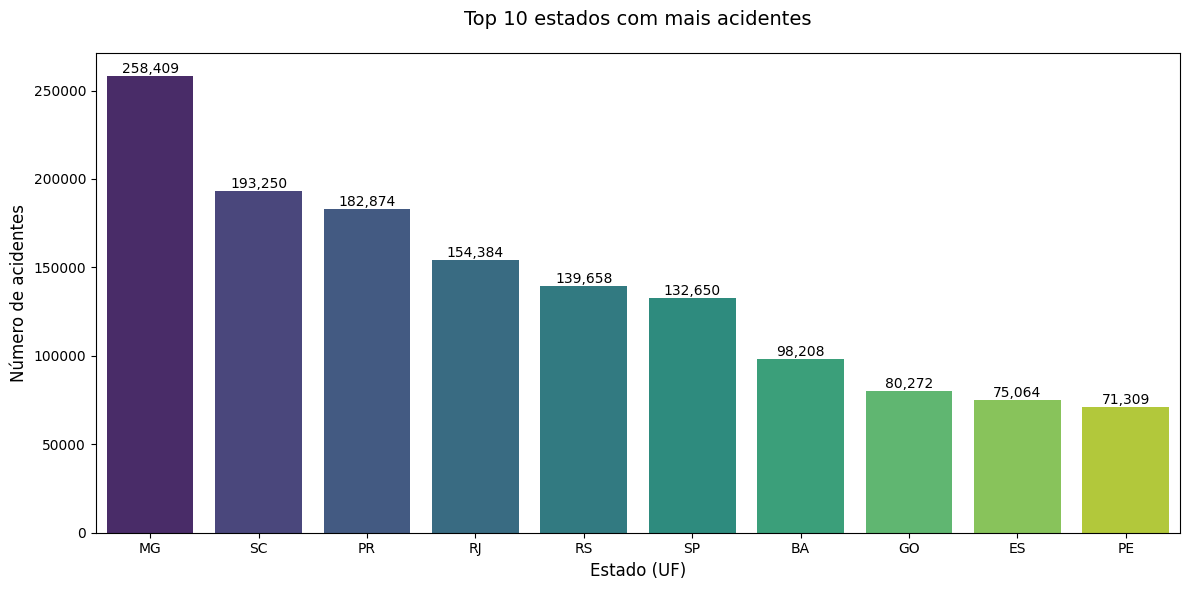

In [13]:
plt.figure(figsize=(12, 6))
top_states = df['uf'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title("Top 10 estados com mais acidentes", pad=20, fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Número de acidentes", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Adicionar valores nas barras
for i, v in enumerate(top_states.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3.	Distribuição dos tipos de acidentes:

-   

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/1917159613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_acidente_counts.values, y=tipo_acidente_counts.index,


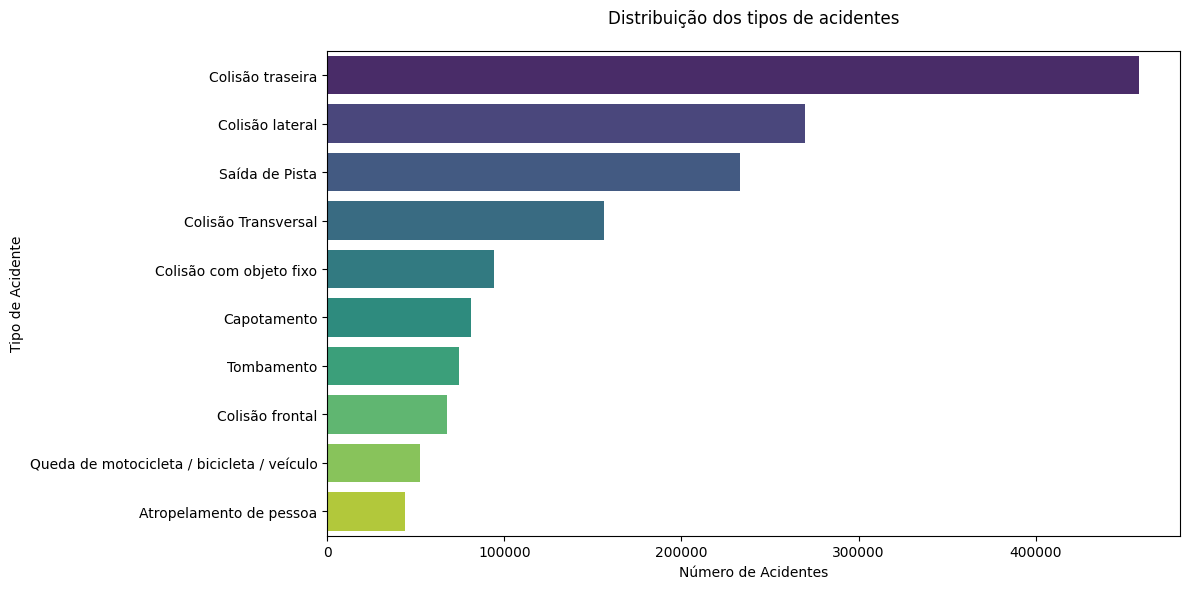

In [12]:
plt.figure(figsize=(12, 6))
tipo_acidente_counts = df['tipo_acidente'].value_counts().head(10)
sns.barplot(x=tipo_acidente_counts.values, y=tipo_acidente_counts.index, 
            palette='viridis')
plt.title("Distribuição dos tipos de acidentes", pad=20)
plt.xlabel("Número de Acidentes")
plt.ylabel("Tipo de Acidente")
plt.tight_layout()
plt.show()

# 4.	Número de mortes por ano:

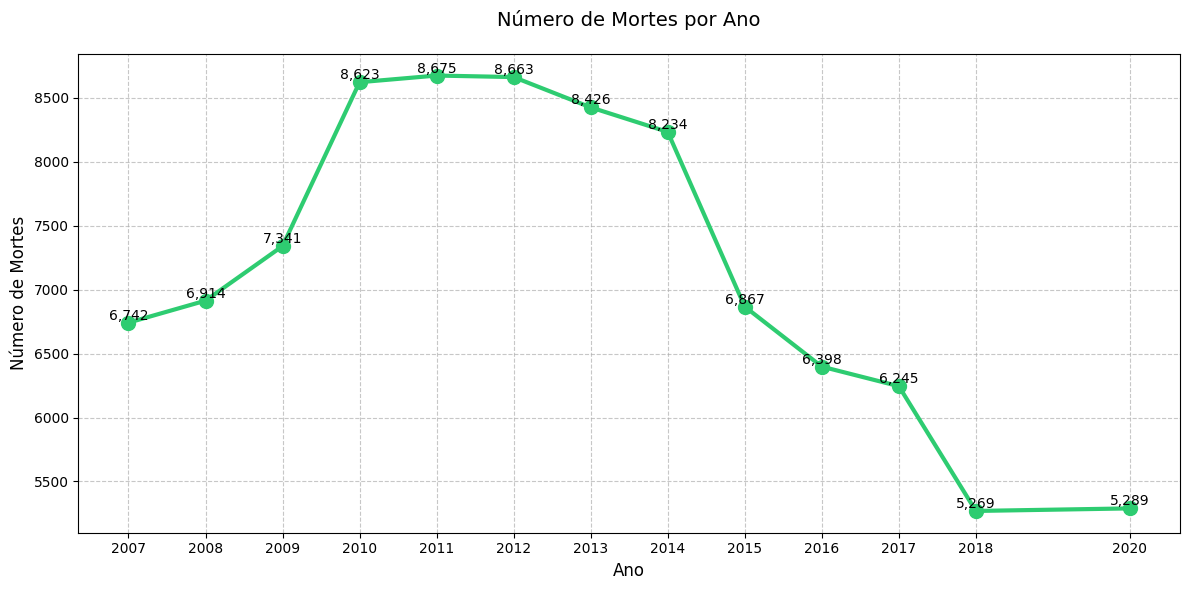

In [16]:
plt.figure(figsize=(12, 6))
mortes_por_ano = df.groupby('ano')['mortos'].sum()

# Criar gráfico de linha com marcadores e linha mais grossa
plt.plot(mortes_por_ano.index, mortes_por_ano.values, marker='o', linewidth=3, 
         markersize=10, color='#2ecc71')

# Adicionar título e labels com fonte maior
plt.title("Número de Mortes por Ano", pad=20, fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Mortes", fontsize=12)

# Melhorar a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Rotacionar e ajustar tamanho dos ticks
plt.xticks(mortes_por_ano.index, rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Adicionar valores nos pontos
for x, y in zip(mortes_por_ano.index, mortes_por_ano.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5.	Análise da gravidade dos acidentes (classificação):


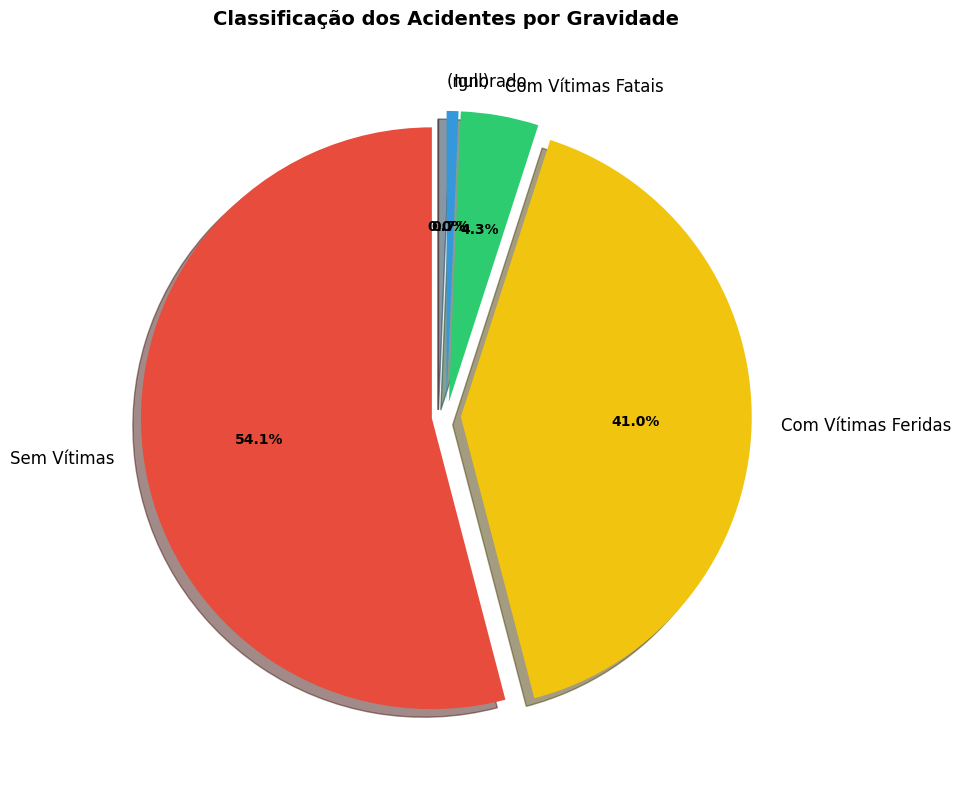

In [18]:
# Configurar tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular contagem e ordenar
classificacao_counts = df['classificacao_acidente'].value_counts()

# Criar gráfico de pizza com cores personalizadas
colors = ['#e74c3c', '#f1c40f', '#2ecc71', '#3498db']
wedges, texts, autotexts = plt.pie(classificacao_counts.values, 
                                  labels=classificacao_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  shadow=True,
                                  explode=[0.05] * len(classificacao_counts))

# Melhorar aparência do texto
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Adicionar título com estilo
plt.title("Classificação dos Acidentes por Gravidade", 
          pad=20, 
          fontsize=14, 
          fontweight='bold')

# Ajustar layout
plt.tight_layout()
plt.show()

# 6.	Distribuição de acidentes por condição meteorológica:


/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/2338108192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condicao_counts.index,


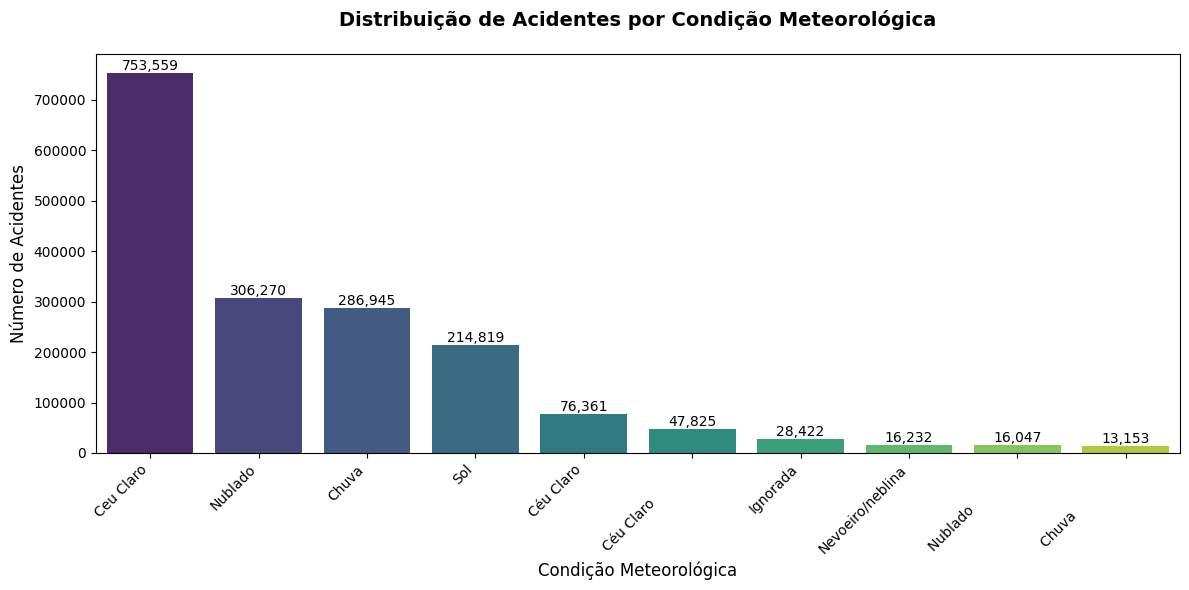

In [21]:
# Configurar tamanho da figura
plt.figure(figsize=(12, 6))

# Obter dados e ordenar
condicao_counts = df['condicao_metereologica'].value_counts().head(10)

# Criar gráfico de barras com estilo
sns.barplot(x=condicao_counts.index, 
            y=condicao_counts.values,
            palette='viridis')

# Personalizar aparência
plt.title("Distribuição de Acidentes por Condição Meteorológica",
          pad=20,
          fontsize=14,
          fontweight='bold')
plt.xlabel("Condição Meteorológica", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Rotacionar e ajustar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(condicao_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

#	7.	Acidentes por período do dia (fase_dia):

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/3007392882.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fase_dia_counts.index,


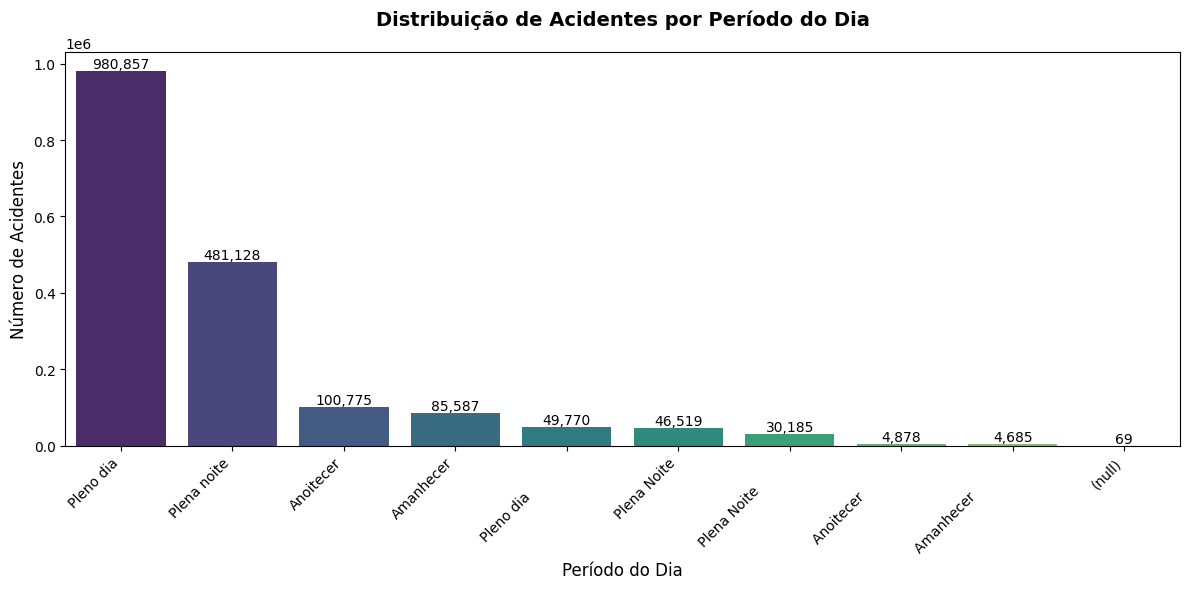

In [23]:
# Configurar tamanho da figura
plt.figure(figsize=(12, 6))

# Obter dados e ordenar
fase_dia_counts = df['fase_dia'].value_counts()

# Criar gráfico de barras com estilo
sns.barplot(x=fase_dia_counts.index,
            y=fase_dia_counts.values,
            palette='viridis')

# Personalizar aparência
plt.title("Distribuição de Acidentes por Período do Dia",
          pad=20,
          fontsize=14,
          fontweight='bold')
plt.xlabel("Período do Dia", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Rotacionar e ajustar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(fase_dia_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

# 8.	Número médio de feridos por tipo de acidente:


/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/280878094.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_feridos.values,


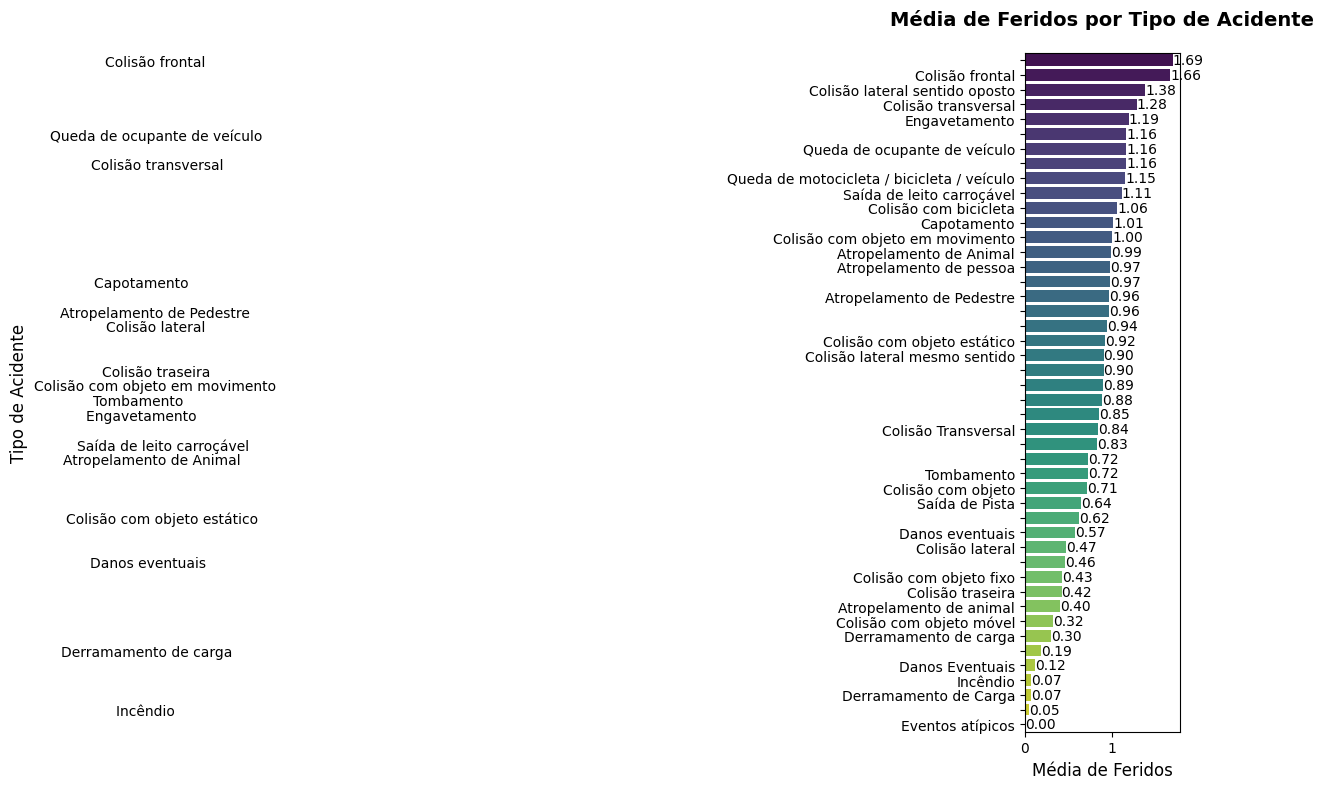

In [24]:
# Calcular média de feridos por tipo de acidente
media_feridos = df.groupby('tipo_acidente')['feridos'].mean().round(2)
media_feridos = media_feridos.sort_values(ascending=False)

# Configurar tamanho da figura
plt.figure(figsize=(12, 8))

# Criar gráfico de barras com estilo
sns.barplot(x=media_feridos.values, 
            y=media_feridos.index,
            palette='viridis')

# Personalizar aparência
plt.title("Média de Feridos por Tipo de Acidente",
          pad=20,
          fontsize=14, 
          fontweight='bold')
plt.xlabel("Média de Feridos", fontsize=12)
plt.ylabel("Tipo de Acidente", fontsize=12)

# Adicionar valores nas barras
for i, v in enumerate(media_feridos.values):
    plt.text(v, i, f'{v:.2f}', va='center')

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()

# 9.	Distribuição de acidentes por tipo de pista:

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/474805387.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pista_counts.index,


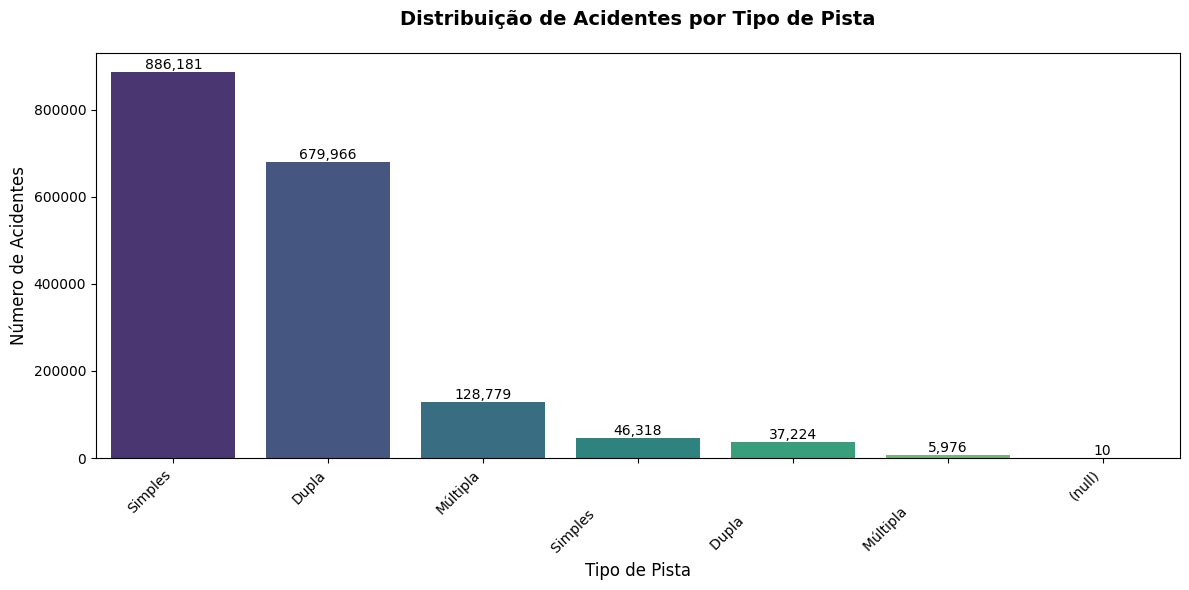

In [26]:
# Calcular contagem de acidentes por tipo de pista
pista_counts = df['tipo_pista'].value_counts()
pista_counts = pista_counts.sort_values(ascending=False)

# Configurar tamanho da figura
plt.figure(figsize=(12, 6))

# Criar gráfico de barras com estilo
sns.barplot(x=pista_counts.index, 
            y=pista_counts.values,
            palette='viridis')

# Personalizar aparência
plt.title("Distribuição de Acidentes por Tipo de Pista",
          pad=20,
          fontsize=14,
          fontweight='bold')
plt.xlabel("Tipo de Pista", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Rotacionar e ajustar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(pista_counts.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

# 10.	Distribuição de acidentes em áreas urbanas vs rurais:

/var/folders/r3/6j8prd3x0jg6xz2sfxb67dgw0000gn/T/ipykernel_42715/1951687479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uso_solo_counts.index,


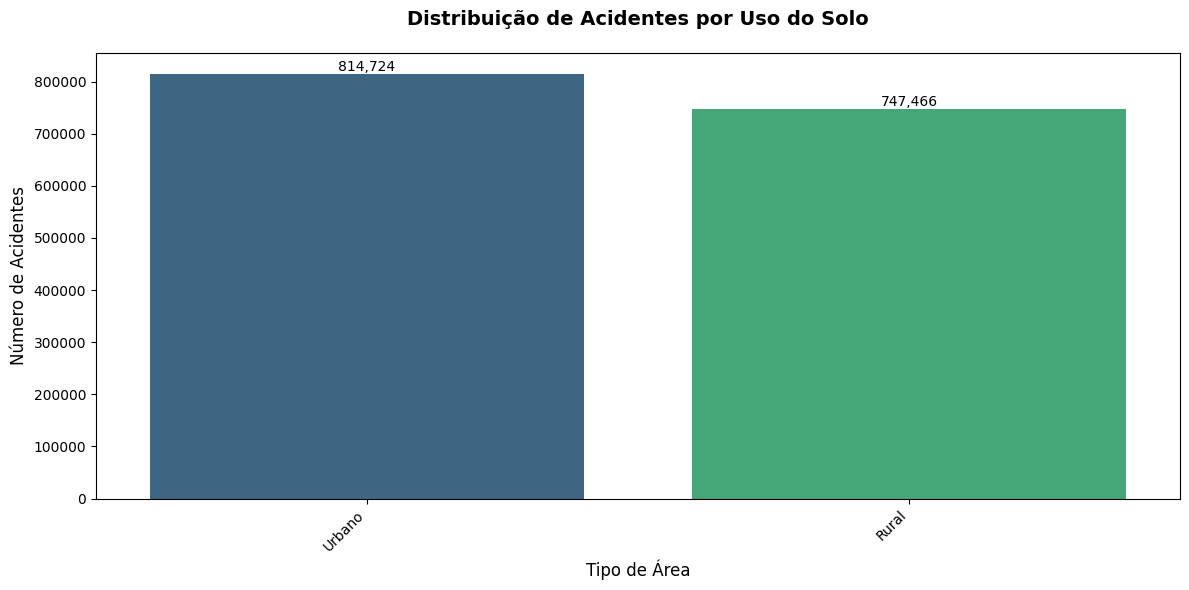

In [29]:
# Calcular contagem de acidentes por uso do solo
uso_solo_counts = df['uso_solo'].value_counts().head(2)
uso_solo_counts = uso_solo_counts.sort_values(ascending=False)

# Configurar tamanho da figura
plt.figure(figsize=(12, 6))

# Criar gráfico de barras com estilo
sns.barplot(x=uso_solo_counts.index,
            y=uso_solo_counts.values,
            palette='viridis')

# Personalizar aparência
plt.title("Distribuição de Acidentes por Uso do Solo",
          pad=20,
          fontsize=14,
          fontweight='bold')
plt.xlabel("Tipo de Área", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Rotacionar e ajustar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(uso_solo_counts.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

# 11. Classificação da Gravidade do Acidente (classificacao_acidente) com Árvore de Decisão

Essa análise tenta prever a severidade do acidente (classificacao_acidente) com base em variáveis como tipo_acidente, condicao_metereologica, tipo_pista, entre outras. Utilizamos o modelo de Árvore de Decisão, que pode fornecer insights sobre as variáveis mais importantes para predizer a gravidade.

Objetivo: Identificar quais fatores estão mais fortemente associados à gravidade dos acidentes. Isso pode ser usado, por exemplo, para mapear áreas de risco.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Selecionar variáveis de interesse e remover valores ausentes
df_classificacao = df[['tipo_acidente', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'fase_dia', 'classificacao_acidente']].dropna()

# Codificar variáveis categóricas
encoder = LabelEncoder()
for column in df_classificacao.columns:
    df_classificacao[column] = encoder.fit_transform(df_classificacao[column])

# Dividir dados em features e target
X = df_classificacao.drop(columns=['classificacao_acidente'])
y = df_classificacao['classificacao_acidente']

# Separar em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Avaliar o modelo
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.6707239392156313
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.44      0.06      0.11     23344
           2       0.65      0.52      0.58    219232
           3       0.05      0.00      0.00      3450
           4       0.68      0.84      0.76    289305

    accuracy                           0.67    535335
   macro avg       0.36      0.29      0.29    535335
weighted avg       0.65      0.67      0.65    535335



/Users/guilherme-seguro/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guilherme-seguro/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guilherme-seguro/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# 12. Clusterização de Acidentes com K-Means para Identificar Agrupamentos

Usando o K-Means, podemos tentar identificar agrupamentos naturais nos dados para entender se certos tipos de acidentes ocorrem em padrões específicos, como por condição meteorológica, período do dia ou tipo de pista. Essa técnica pode ajudar na segmentação de cenários de risco e otimização de recursos de prevenção.

Objetivo: Identificar segmentos específicos de acidentes que poderiam ser alvo de campanhas de conscientização ou de infraestrutura rodoviária.


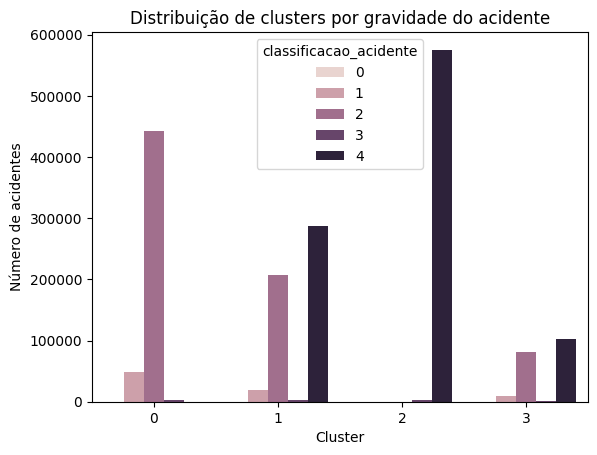

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Selecionar variáveis para a clusterização
df_cluster = df[['condicao_metereologica', 'fase_dia', 'tipo_pista', 'classificacao_acidente']].dropna()

# Codificar variáveis categóricas
for column in df_cluster.columns:
    df_cluster[column] = encoder.fit_transform(df_cluster[column])

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters
sns.countplot(data=df_cluster, x='cluster', hue='classificacao_acidente')
plt.title("Distribuição de clusters por gravidade do acidente")
plt.xlabel("Cluster")
plt.ylabel("Número de acidentes")
plt.show()

# 13. Regressão para Estimar o Número de Feridos com base em Variáveis Ambientais e Tipo de Acidente

Esse modelo de regressão linear múltipla estima o número de feridos em um acidente com base em variáveis ambientais, como condicao_metereologica, tipo_acidente, e fase_dia. Esse tipo de previsão pode auxiliar no planejamento de recursos de saúde e resposta a emergências.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecionar variáveis e remover valores ausentes
df_regressao = df[['feridos', 'tipo_acidente', 'condicao_metereologica', 'fase_dia', 'uso_solo']].dropna()

# Codificar variáveis categóricas
for column in df_regressao.columns:
    if df_regressao[column].dtype == 'object':
        df_regressao[column] = encoder.fit_transform(df_regressao[column])

# Dividir em features e target
X = df_regressao.drop(columns=['feridos'])
y = df_regressao['feridos']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Avaliar o modelo
y_pred = regressor.predict(X_test)
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))

Erro Quadrático Médio (MSE): 1.3527130594010206
